In [227]:
years = list(range(1994, 2025))

### **Fetch MVP data**

In [6]:
mvps_base_url = "https://www.basketball-reference.com/awards/awards_{}.html"

In [7]:
# Get MVP leaderboard from every year in years.

In [8]:
import time
import requests

In [228]:
for year in years:
    url = mvps_base_url.format(year)
    data = requests.get(url) # Response
    data.encoding = data.apparent_encoding


    # Record html. (So you don't send requests every single time)
    with open("mvps/{}.html".format(year), "w+", encoding='utf-8') as f:
        f.write(data.text)

    time.sleep(5)
        

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

In [229]:
dataframes = []

# Fetch mvp data from last 30 years.
for year in years:
    with open("mvps/{}.html".format(year), encoding='utf-8') as f:
        page = f.read() # Store as string

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp_table_parsed = pd.read_html(StringIO(str(mvp_table)))[0]
    mvp_table_parsed["Year"] = year
    
    dataframes.append(mvp_table_parsed)

In [234]:
mvps = pd.concat(dataframes)

In [235]:
mvps.to_csv("csv/mvps.csv")

### **Fetch Player data**

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from webdriver_manager.chrome import ChromeDriverManager

# # Path to the Brave browser executable on macOS
# brave_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

# # Set up ChromeOptions to use Brave
# options = Options()
# options.binary_location = brave_path

# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


In [ ]:
# import time

# url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

# for year in years:
#     driver.get(url.format(year))
#     driver.execute_script("window.scrollTo(1,10000)")
#     time.sleep(5)
#     html = driver.page_source

#     with open("players/{}.html".format(year), "w+") as f:
#         f.write(html)

In [ ]:
# dataframes = []

for year in years:
    with open("players/{}.html".format(year)) as f:
        page = f.read()

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    players_table = soup.find(id="per_game_stats")
    players_table_parsed = pd.read_html(StringIO(str(players_table)))[0]
    players_table_parsed["Year"] = year

    dataframes.append(players_table_parsed)

In [15]:
players_stats = pd.concat(dataframes)

NameError: name 'dataframes' is not defined

In [ ]:
players_stats.to_csv("csv/player_stats.csv")

### **Fetch Team Data**

In [ ]:
team_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [ ]:
import time

In [ ]:
# for year in years:
#     url = team_url.format(year)
#     data = requests.get(url)
#     time.sleep(5)

#     with open("teams/{}.html".format(year), "w+" ) as f:
#         f.write(data.text)

In [ ]:
df = []

for year in years:
    with open("teams/{}.html".format(year)) as f:
        page = f.read()
        
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_='thead').decompose()
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(StringIO(str(team_table)))[0]
    team["Year"] = year
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"]
    
    df.append(team)
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(StringIO(str(team_table)))[0]
    team["Year"] = year
    team["Team"] = team["Western Conference"]
    del team["Western Conference"]
    
    df.append(team)

In [ ]:
teams = pd.concat(df)

In [ ]:
teams.to_csv("csv/teams.csv")

### **Data Cleaning**

In [9]:
mvps = pd.read_csv("csv/mvps.csv", encoding="utf-8")

In [10]:
mvps.tail(30)

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
427,4,5,Luka Dončić,22,DAL,0,146,1000,0.146,65,...,9.1,8.7,1.2,0.6,0.457,0.353,0.744,7.6,0.159,2022
428,5,6,Jayson Tatum,23,BOS,0,43,1000,0.043,76,...,8.0,4.4,1.0,0.6,0.453,0.353,0.853,9.6,0.169,2022
429,6,7,Ja Morant,22,MEM,0,10,1000,0.010,57,...,5.7,6.7,1.2,0.4,0.493,0.344,0.761,6.7,0.171,2022
430,7,8,Stephen Curry,33,GSW,0,4,1000,0.004,64,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
431,8,9,Chris Paul,36,PHO,0,2,1000,0.002,65,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
432,9,10T,DeMar DeRozan,32,CHI,0,1,1000,0.001,76,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
433,10,10T,Kevin Durant,33,BRK,0,1,1000,0.001,55,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022
434,11,10T,LeBron James,37,LAL,0,1,1000,0.001,56,...,8.2,6.2,1.3,1.1,0.524,0.359,0.756,7.5,0.172,2022
435,0,1,Joel Embiid,28,PHI,73,915,1000,0.915,66,...,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259,2023
436,1,2,Nikola Jokić,27,DEN,15,674,1000,0.674,69,...,11.8,9.8,1.3,0.7,0.632,0.383,0.822,14.9,0.308,2023


In [11]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [12]:
mvps

,Player,Year,Pts Won,Pts Max,Share
0,Hakeem Olajuwon,1994,889,1010,0.880
1,David Robinson,1994,730,1010,0.723
2,Scottie Pippen,1994,390,1010,0.386
3,Shaquille O'Neal,1994,289,1010,0.286
4,Patrick Ewing,1994,255,1010,0.252
...,...,...,...,...,...
452,Jalen Brunson,2024,142,990,0.143
453,Jayson Tatum,2024,86,990,0.087
454,Anthony Edwards,2024,18,990,0.018
455,Domantas Sabonis,2024,3,990,0.003


In [13]:
players = pd.read_csv("csv/player_stats.csv")

In [14]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,1,2,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,2,3,Michael Adams,PG,31,WSB,70,67,33.4,4.1,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,3,4,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,4,5,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18944,757,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
18945,758,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
18946,759,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
18947,760,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024


In [15]:
del players["Unnamed: 0"]
del players["Rk"]

In [16]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994


In [17]:
players["Player"] = players["Player"].str.replace("*", "", regex=False) # Some players have a * at the end of their name

In [18]:
players.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,.436,...,0.9,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994
1,Mahmoud Abdul-Rauf,PG,24,DEN,80,78,32.7,7.4,16.0,.460,...,0.3,1.8,2.1,4.5,1.0,0.1,1.9,1.9,18.0,1994
2,Michael Adams,PG,31,WSB,70,67,33.4,4.1,10.0,.408,...,0.5,2.1,2.6,6.9,1.4,0.1,2.4,2.0,12.1,1994
3,Mark Aguirre,SF,34,LAC,39,0,22.0,4.2,8.9,.468,...,0.7,2.3,3.0,2.7,0.5,0.2,1.8,2.5,10.6,1994
4,Danny Ainge,SG,34,PHO,68,1,22.9,3.3,7.9,.417,...,0.4,1.5,1.9,2.6,0.8,0.1,1.2,2.1,8.9,1994
5,Gary Alexander,PF,24,TOT,11,0,5.0,0.7,1.3,.571,...,0.6,0.7,1.4,0.2,0.3,0.0,0.7,0.9,1.7,1994
6,Gary Alexander,PF,24,MIA,4,0,3.0,0.3,0.5,.500,...,0.3,0.5,0.8,0.3,0.0,0.0,0.3,0.8,0.5,1994
7,Gary Alexander,PF,24,CLE,7,0,6.1,1.0,1.7,.583,...,0.9,0.9,1.7,0.1,0.4,0.0,1.0,1.0,2.4,1994
8,Victor Alexander,C,24,GSW,69,39,19.1,3.9,7.3,.530,...,1.7,2.8,4.5,1.0,0.4,0.5,1.2,2.4,8.7,1994
9,Eric Anderson,PF,23,NYK,11,0,3.5,0.6,1.5,.412,...,0.5,1.0,1.5,0.2,0.0,0.1,0.2,0.8,1.9,1994


In [19]:
players.groupby(["Player", "Year"]).get_group(("Gary Alexander", 1994)) 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
5,Gary Alexander,PF,24,TOT,11,0,5.0,0.7,1.3,.571,...,0.6,0.7,1.4,0.2,0.3,0.0,0.7,0.9,1.7,1994
6,Gary Alexander,PF,24,MIA,4,0,3.0,0.3,0.5,.500,...,0.3,0.5,0.8,0.3,0.0,0.0,0.3,0.8,0.5,1994
7,Gary Alexander,PF,24,CLE,7,0,6.1,1.0,1.7,.583,...,0.9,0.9,1.7,0.1,0.4,0.0,1.0,1.0,2.4,1994


In [20]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_row)

/var/folders/0p/_6483prs69vgz_scs5wdyb940000gn/T/ipykernel_3042/3467767470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players = players.groupby(["Player", "Year"]).apply(single_row)


In [21]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                              
A.C. Green    1994 177       A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 665       A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 1161      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 1736      A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 2323      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 2881      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 3409      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 3928      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 3282   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. Green    2023 17713     A.J. Green  SG  23  MIL  35   1   9.9  1.5   3.6   
              2024 18445     A.J. Green  SG  24  MIL  56   0  11.0  1.5   3.5   
A.J. Guyton   2001 3931     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 4484     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 4991     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 13412   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Lawson   2023 17857    A.J. Lawson  SG  22  DAL  15   0   7.2  1.5   2.9   
              2024 18567    A.J. Lawson  SG  23  DAL  42   0   7.4  1.3   2.9   
A.J. Price    2010 9325      A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 9954      A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   
              2012 10538     A.J. Price  PG  25  IND  44   1  12.9  1.3   4.0   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1994 177    .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 665    .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 1161   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 1736   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 2323   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 2881   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 3409   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 3928   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 3282   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. Green    2023 17713  .424  ...  0.2  1.1  1.3  0.6  0.2  0.0  0.3  0.9   
              2024 18445  .423  ...  0.2  1.0  1.1  0.5  0.2  0.1  0.2  0.9   
A.J. Guyton   2001 3931   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 4484   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 4991   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 13412  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Lawson   2023 17857  .500  ...  0.4  1.0  1.4  0.1  0.1  0.0  0.2  0.7   
              2024 18567  .446  ...  0.3  0.9  1.2  0.5  0.2  0.1  0.3  0.5   
A.J. Price    2010 9325   .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 9954   .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   
              2012 10538  .339  ...  0.3  1.1  1.4  2.0  0.5  0.0  0.7  0.7   

                           PTS  Year  
Player        Year                    
A.C. Green    1994 177    14.7  1994  
              1995 665    11.2  1995  
              1996 1161    7.5  1996  
              1997 1736    7.2  1997  
              1998 2323    7.3  1998  
              1999 2881    4.9  1999  
              2000 3409    5.0  2000  
              2001 3928    4.5  2001  
A.J. Bramlett 2000 3282    1.0  2000  
A.J. Green    2023 17713   4.4  2023  
              2024 18445   4.5  2024  
A.J.

In [22]:
players.index = players.index.droplevel()

In [23]:
players.index = players.index.droplevel()

In [24]:
players.tail(100)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
9338,Zach Randolph,PF,28,MEM,81,81,37.7,8.0,16.5,.488,...,4.1,7.7,11.7,1.8,1.0,0.4,2.1,2.8,20.8,2010
9966,Zach Randolph,PF,29,MEM,75,74,36.3,8.0,15.8,.503,...,4.3,7.8,12.2,2.2,0.8,0.3,2.0,2.3,20.1,2011
10545,Zach Randolph,PF,30,MEM,28,8,26.3,4.7,10.2,.463,...,2.8,5.3,8.0,1.7,0.8,0.1,1.4,2.0,11.6,2012
11141,Zach Randolph,PF,31,MEM,76,75,34.3,6.2,13.5,.460,...,4.1,7.2,11.2,1.4,0.8,0.4,2.0,2.4,15.4,2013
11768,Zach Randolph,PF,32,MEM,79,79,34.2,7.1,15.2,.467,...,3.4,6.7,10.1,2.5,0.7,0.3,2.3,2.7,17.4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
5193,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
5774,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
6374,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [25]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [26]:
combined.tail(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
14642,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14643,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14644,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14645,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN
14646,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.3,0.2,0.7,0.8,2.0,4.7,2006,NaN,NaN,NaN


In [27]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [28]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0


In [29]:
teams = pd.read_csv("csv/teams.csv")

In [30]:
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,98.5,91.5,6.48,1994,New York Knicks*
1,1,50,32,.610,7.0,105.7,101.8,3.68,1994,Orlando Magic*
2,2,45,37,.549,12.0,103.2,101.0,2.11,1994,New Jersey Nets*
3,3,42,40,.512,15.0,103.4,100.7,2.40,1994,Miami Heat*
4,4,32,50,.390,25.0,100.8,105.1,-4.28,1994,Boston Celtics
5,5,25,57,.305,32.0,98.0,105.6,-7.37,1994,Philadelphia 76ers
6,6,24,58,.293,33.0,100.4,107.7,-7.13,1994,Washington Bullets
7,7,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1994,Central Division
8,8,57,25,.695,—,101.4,96.2,4.94,1994,Atlanta Hawks*
9,9,55,27,.671,2.0,98.0,94.9,2.87,1994,Chicago Bulls*


In [31]:
teams = teams[~teams["W"].str.contains("Division")]

In [32]:
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,98.5,91.5,6.48,1994,New York Knicks*
1,1,50,32,.610,7.0,105.7,101.8,3.68,1994,Orlando Magic*
2,2,45,37,.549,12.0,103.2,101.0,2.11,1994,New Jersey Nets*
3,3,42,40,.512,15.0,103.4,100.7,2.40,1994,Miami Heat*
4,4,32,50,.390,25.0,100.8,105.1,-4.28,1994,Boston Celtics
5,5,25,57,.305,32.0,98.0,105.6,-7.37,1994,Philadelphia 76ers
6,6,24,58,.293,33.0,100.4,107.7,-7.13,1994,Washington Bullets
8,8,57,25,.695,—,101.4,96.2,4.94,1994,Atlanta Hawks*
9,9,55,27,.671,2.0,98.0,94.9,2.87,1994,Chicago Bulls*
10,10,47,35,.573,10.0,101.0,97.5,3.26,1994,Indiana Pacers*


In [33]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [34]:
del teams["Unnamed: 0"]

In [35]:
teams.head(5)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,57,25,.695,—,98.5,91.5,6.48,1994,New York Knicks
1,50,32,.610,7.0,105.7,101.8,3.68,1994,Orlando Magic
2,45,37,.549,12.0,103.2,101.0,2.11,1994,New Jersey Nets
3,42,40,.512,15.0,103.4,100.7,2.40,1994,Miami Heat
4,32,50,.390,25.0,100.8,105.1,-4.28,1994,Boston Celtics


In [36]:
teams["Team"].unique()

array(['New York Knicks', 'Orlando Magic', 'New Jersey Nets',
       'Miami Heat', 'Boston Celtics', 'Philadelphia 76ers',
       'Washington Bullets', 'Atlanta Hawks', 'Chicago Bulls',
       'Indiana Pacers', 'Cleveland Cavaliers', 'Charlotte Hornets',
       'Milwaukee Bucks', 'Detroit Pistons', 'Houston Rockets',
       'San Antonio Spurs', 'Utah Jazz', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Dallas Mavericks',
       'Seattle SuperSonics', 'Phoenix Suns', 'Golden State Warriors',
       'Portland Trail Blazers', 'Los Angeles Lakers', 'Sacramento Kings',
       'Los Angeles Clippers', 'Toronto Raptors', 'Vancouver Grizzlies',
       'Washington Wizards', 'Memphis Grizzlies', 'New Orleans Hornets',
       'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets',
       'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans'],
      dtype=object)

In [37]:
combined["Tm"].unique()

array(['PHO', 'DAL', 'LAL', 'MIA', 'CLE', 'MIL', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'ATL', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'BOS', 'OKC', 'UTA', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK', 'SAS',
       'CHH', 'WSB'], dtype=object)

In [38]:
data = {
    "Abbreviation": ["ATL", "BRK", "BKN", "BOS", "CHA", "CHH", "CHO", "CHI", "CLE", "DAL",
                     "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL",
                     "MIN", "NJN", "NOH", "NOP", "NOK", "NYK", "OKC", "ORL", "PHI", "PHX",
                     "PHO", "POR", "SEA", "SAC", "SAS", "TOR", "UTA", "VAN", "WAS", "WSB"],
    "Name": ["Atlanta Hawks", "Brooklyn Nets", "Brooklyn Nets", "Boston Celtics", "Charlotte Bobcats",
             "Charlotte Hornets", "Charlotte Hornets", "Chicago Bulls", "Cleveland Cavaliers",
             "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", "Golden State Warriors",
             "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers", "Los Angeles Lakers",
             "Memphis Grizzlies", "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves",
             "New Jersey Nets", "New Orleans Hornets", "New Orleans Pelicans",
             "New Orleans/Oklahoma City Hornets", "New York Knicks", "Oklahoma City Thunder",
             "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns", "Phoenix Suns",
             "Portland Trail Blazers", "Seattle SuperSonics", "Sacramento Kings",
             "San Antonio Spurs", "Toronto Raptors", "Utah Jazz", "Vancouver Grizzlies",
             "Washington Wizards", "Washington Bullets"]
}

team_names = pd.DataFrame(data)
team_names.to_csv("csv/teamNames.csv", index=False)

In [39]:
nicknames = {}

with open("csv/teamNames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abb, name = line.replace("\n", "").split(",")
        nicknames[abb] = name

In [40]:
combined["Tm"]

0        PHO
1        PHO
2        PHO
3        DAL
4        DAL
        ... 
14642    DET
14643    DET
14644    ATL
14645    LAC
14646    LAC
Name: Tm, Length: 14647, dtype: object

In [41]:
combined["Team"] = combined["Tm"].map(nicknames)

In [42]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
1,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
2,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0,Dallas Mavericks
4,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0,Dallas Mavericks


In [43]:
stats = combined.merge(teams, how="outer", on=["Team", "Year"])

In [44]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Adam Keefe,PF,23,ATL,63,1,12.1,1.5,3.4,.451,...,0.0,0.0,Atlanta Hawks,57,25,.695,—,101.4,96.2,4.94
1,Andrew Lang,C,27,ATL,82,0,19.6,2.6,5.6,.469,...,0.0,0.0,Atlanta Hawks,57,25,.695,—,101.4,96.2,4.94
2,Craig Ehlo,SG,32,ATL,82,0,26.2,3.9,8.6,.446,...,0.0,0.0,Atlanta Hawks,57,25,.695,—,101.4,96.2,4.94
3,Danny Manning,PF,27,ATL,68,66,37.1,8.6,17.7,.488,...,0.0,0.0,Atlanta Hawks,57,25,.695,—,101.4,96.2,4.94
4,Doug Edwards,PF,23,ATL,16,0,6.7,1.1,3.1,.347,...,0.0,0.0,Atlanta Hawks,57,25,.695,—,101.4,96.2,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,.586,...,0.0,0.0,Washington Wizards,15,67,.183,32.0,113.7,123.0,-9.29
14643,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,.381,...,0.0,0.0,Washington Wizards,15,67,.183,32.0,113.7,123.0,-9.29
14644,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,.558,...,0.0,0.0,Washington Wizards,15,67,.183,32.0,113.7,123.0,-9.29
14645,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,.433,...,0.0,0.0,Washington Wizards,15,67,.183,32.0,113.7,123.0,-9.29


In [45]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [46]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [47]:
stats["GB"].unique()

array(['0', '10.0', '26.0', '13.0', '12.0', '2.0', '28.0', '27.0', '17.0',
       '15.0', '33.0', '46.0', '14.0', '6.0', '22.0', '16.0', '20.0',
       '21.0', '3.0', '11.0', '25.0', '19.0', '5.0', '23.0', '12.5',
       '9.0', '8.0', '4.0', '35.0', '31.0', '18.0', '1.0', '7.0', '32.0',
       '41.0', '24.0', '39.0', '45.0', '37.0', '29.0', '38.0', '4.5',
       '30.0', '43.0', '25.5', '40.0', '42.0', '2.5', '51.0', '34.0',
       '20.5', '32.5', '48.0', '36.0', '44.0', '52.0', '3.5', '56.0',
       '10.5', '47.0', '11.5', '22.5', '1.5', '50.0', '21.5', '18.5'],
      dtype=object)

In [48]:
stats = stats.apply(pd.to_numeric, errors="ignore")

/var/folders/0p/_6483prs69vgz_scs5wdyb940000gn/T/ipykernel_3042/3865212684.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  stats = stats.apply(pd.to_numeric, errors="ignore")


In [49]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [50]:
stats.to_csv("csv/train.csv")

In [51]:
top_scorers = stats[stats["G"] > 50].sort_values("PTS", ascending=False).head(20)

<Axes: xlabel='Player'>

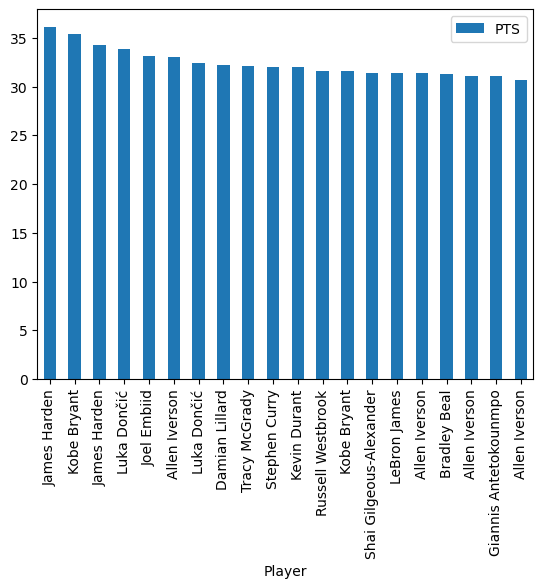

In [52]:
top_scorers.plot.bar("Player", "PTS")

In [53]:
top_scorers = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

/var/folders/0p/_6483prs69vgz_scs5wdyb940000gn/T/ipykernel_3042/3606902641.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_scorers = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))


In [54]:
top_scorers

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1994,12370,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,9948,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,1710,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,1724,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,1738,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,10491,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56
2000,6229,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,...,1210.0,0.998,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41
2001,10522,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56,26,0.683,0.0,94.7,90.4,3.64
2002,10538,Allen Iverson,SG,26,PHI,60,59,43.7,11.1,27.8,0.398,...,1260.0,0.023,Philadelphia 76ers,43,39,0.524,9.0,91.0,89.4,1.27


<Axes: xlabel='Year'>

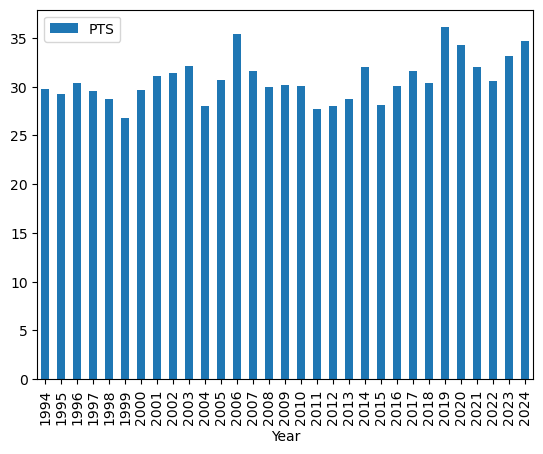

In [55]:
top_scorers.plot.bar("Year", "PTS")

In [56]:
stats.corr(numeric_only=True)["Share"]

Age        0.017037
G          0.088606
GS         0.165747
MP         0.157873
FG         0.271736
FGA        0.243267
FG%        0.063782
3P         0.090844
3PA        0.090629
3P%        0.013629
2P         0.276811
2PA        0.252057
2P%        0.056273
eFG%       0.054508
FT         0.317909
FTA        0.324143
FT%        0.035083
ORB        0.100041
DRB        0.217635
TRB        0.190132
AST        0.204783
STL        0.165884
BLK        0.146945
TOV        0.234415
PF         0.073456
PTS        0.282831
Year      -0.008622
Pts Won    0.995466
Pts Max    0.525781
Share      1.000000
W          0.117359
L         -0.117183
W/L%       0.121432
GB        -0.095470
PS/G       0.034516
PA/G      -0.035931
SRS        0.115747
Name: Share, dtype: float64

<Axes: >

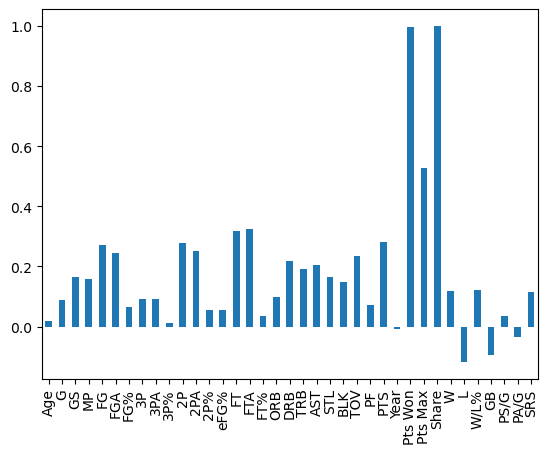

In [57]:
stats.corr(numeric_only=True)["Share"].plot.bar()

### Predicting the MVP ###


In [73]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Adam Keefe,PF,23,ATL,63,1,12.1,1.5,3.4,0.451,...,0.0,0.0,Atlanta Hawks,57,25,0.695,0.0,101.4,96.2,4.94
1,Andrew Lang,C,27,ATL,82,0,19.6,2.6,5.6,0.469,...,0.0,0.0,Atlanta Hawks,57,25,0.695,0.0,101.4,96.2,4.94
2,Craig Ehlo,SG,32,ATL,82,0,26.2,3.9,8.6,0.446,...,0.0,0.0,Atlanta Hawks,57,25,0.695,0.0,101.4,96.2,4.94
3,Danny Manning,PF,27,ATL,68,66,37.1,8.6,17.7,0.488,...,0.0,0.0,Atlanta Hawks,57,25,0.695,0.0,101.4,96.2,4.94
4,Doug Edwards,PF,23,ATL,16,0,6.7,1.1,3.1,0.347,...,0.0,0.0,Atlanta Hawks,57,25,0.695,0.0,101.4,96.2,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,0.586,...,0.0,0.0,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29
14643,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,0.381,...,0.0,0.0,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29
14644,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,0.558,...,0.0,0.0,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29
14645,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,0.433,...,0.0,0.0,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29


In [74]:
pd.isnull(stats).sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

Note: Pandas interpreting 3PA = 0 as a null value. Switching it to 0%

In [75]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]]

,Player,3PA


In [78]:
stats = stats.fillna(0)

In [79]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [80]:
training_data = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [81]:
train = stats[stats["Year"] < 2024]

In [82]:
test = stats[stats["Year"] == 2024]

In [83]:
from sklearn.linear_model import Ridge

In [84]:
reg = Ridge(alpha=.1)

In [85]:
reg.fit(train[training_data], train["Share"])

Ridge(alpha=0.1)

In [86]:
predictions = reg.predict(test[training_data])

In [87]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [88]:
predictions

,predictions
481,-0.024791
482,0.003438
483,-0.003684
484,0.007599
485,-0.001351
...,...
14642,-0.001119
14643,-0.008990
14644,-0.028112
14645,0.008526


In [89]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [90]:
combination

,Player,Share,predictions
481,AJ Griffin,0.0,-0.024791
482,Bogdan Bogdanović,0.0,0.003438
483,Bruno Fernando,0.0,-0.003684
484,Clint Capela,0.0,0.007599
485,De'Andre Hunter,0.0,-0.001351
...,...,...,...
14642,Marvin Bagley III,0.0,-0.001119
14643,Patrick Baldwin Jr.,0.0,-0.008990
14644,Richaun Holmes,0.0,-0.028112
14645,Tristan Vukcevic,0.0,0.008526


In [91]:
combination.sort_values("Share", ascending=False).head(20)

,Player,Share,predictions
3662,Nikola Jokić,0.935,0.168646
9919,Shai Gilgeous-Alexander,0.646,0.164496
3172,Luka Dončić,0.572,0.186184
8004,Giannis Antetokounmpo,0.194,0.210875
9635,Jalen Brunson,0.143,0.098523
979,Jayson Tatum,0.087,0.112283
8475,Anthony Edwards,0.018,0.087369
12351,Domantas Sabonis,0.003,0.096430
11392,Kevin Durant,0.001,0.100943
9908,Isaiah Joe,0.000,0.004423


In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
mean_squared_error(combination["Share"], combination["predictions"])

0.002467011474885221

In [94]:
combination["Share"].value_counts()

Share
0.000    563
0.087      1
0.572      1
0.935      1
0.194      1
0.018      1
0.143      1
0.646      1
0.001      1
0.003      1
Name: count, dtype: int64

In [95]:
combination

,Player,Share,predictions
481,AJ Griffin,0.0,-0.024791
482,Bogdan Bogdanović,0.0,0.003438
483,Bruno Fernando,0.0,-0.003684
484,Clint Capela,0.0,0.007599
485,De'Andre Hunter,0.0,-0.001351
...,...,...,...
14642,Marvin Bagley III,0.0,-0.001119
14643,Patrick Baldwin Jr.,0.0,-0.008990
14644,Richaun Holmes,0.0,-0.028112
14645,Tristan Vukcevic,0.0,0.008526


In [96]:
combination = combination.sort_values("Share", ascending=False)

In [97]:
combination["Rank"] = list(range(1, combination.shape[0]+1))

In [98]:
combination.head(10)

,Player,Share,predictions,Rank
3662,Nikola Jokić,0.935,0.168646,1
9919,Shai Gilgeous-Alexander,0.646,0.164496,2
3172,Luka Dončić,0.572,0.186184,3
8004,Giannis Antetokounmpo,0.194,0.210875,4
9635,Jalen Brunson,0.143,0.098523,5
979,Jayson Tatum,0.087,0.112283,6
8475,Anthony Edwards,0.018,0.087369,7
12351,Domantas Sabonis,0.003,0.096430,8
11392,Kevin Durant,0.001,0.100943,9
9908,Isaiah Joe,0.000,0.004423,10


In [99]:
combination = combination.sort_values("predictions", ascending=False)

In [100]:
combination["Predicted_Rank"] = list(range(1, combination.shape[0]+1))

In [101]:
combination.head(10)

,Player,Share,predictions,Rank,Predicted_Rank
8004,Giannis Antetokounmpo,0.194,0.210875,4,1
10907,Joel Embiid,0.000,0.201951,45,2
3172,Luka Dončić,0.572,0.186184,3,3
3662,Nikola Jokić,0.935,0.168646,1,4
9919,Shai Gilgeous-Alexander,0.646,0.164496,2,5
6605,Anthony Davis,0.000,0.130530,439,6
6617,LeBron James,0.000,0.127984,477,7
979,Jayson Tatum,0.087,0.112283,6,8
12856,Victor Wembanyama,0.000,0.101419,173,9
11392,Kevin Durant,0.001,0.100943,9,10


In [102]:
# The program is still taking into account people who didn't get any mvp votes. Let's take the top 8

def find_rank(combination):
    actual = combination.sort_values("Share", ascending=False).head(8)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1

    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        else:
            seen += 1
    return sum(ps) / len(ps)

In [103]:
find_rank(combination)

1.160267857142857

In [104]:
years = list(range(1994, 2025))

-> Backtesting

In [113]:
avg_prec_score = []
all_pred = []

for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[training_data], train["Share"])
    predictions = reg.predict(test[training_data])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_pred.append(combination)
    avg_prec_score.append(find_rank(combination))

In [114]:
sum(avg_prec_score)/len(aps)

1.8007339762543455

In [115]:
def rank(combination):
    combination = combination.sort_values("Share", ascending=False)
    combination["Rank"] = list(range(1, combination.shape[0]+1))
    combination = combination.sort_values("predictions", ascending=False)
    combination["Predicted_Rank"] = list(range(1, combination.shape[0]+1))
    combination["Difference"] = combination["Rank"] - combination["Predicted_Rank"]
    return combination

In [141]:
ranking = rank(all_pred[1])
ranking[ranking["Rank"] < 8].sort_values("Difference", ascending=False)

,Player,Share,predictions,Rank,Predicted_Rank,Difference
13656,Karl Malone,0.258,0.162178,4,2,2
6229,Shaquille O'Neal,0.998,0.241468,1,1,0
7111,Alonzo Mourning,0.303,0.144537,3,3,0
12467,Tim Duncan,0.205,0.116374,5,7,-2
12950,Gary Payton,0.149,0.104302,6,10,-4
10507,Allen Iverson,0.109,0.096128,7,11,-4
8112,Kevin Garnett,0.337,0.111624,2,8,-6


In [138]:
def backtest(stats, model, year, training_data):
    avg_prec_score = []
    all_pred = []
    
    for year in years[5:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[training_data], train["Share"])
        predictions = reg.predict(test[training_data])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = rank(combination)
        all_pred.append(combination)
        avg_prec_score.append(find_rank(combination))
    return sum(avg_prec_score)/len(avg_prec_score), avg_prec_score, pd.concat(all_pred)

In [144]:
mean_avg_prec, avg_prec_score, all_predictions = backtest(stats, reg, years[5:], training_data)

In [145]:
mean_avg_prec

1.8007339762543455

In [183]:
all_predictions[all_predictions["Rank"] <= 8].sort_values("Difference").head(10)

,Player,Share,predictions,Rank,Predicted_Rank,Difference
8625,Jason Kidd,0.712,0.017485,2,91,-89
3413,Chauncey Billups,0.027,0.031745,6,64,-58
11091,Steve Nash,0.839,0.039187,1,41,-40
12035,Peja Stojaković,0.228,0.033381,4,41,-37
1977,Joakim Noah,0.258,0.045245,4,41,-37
8656,Jason Kidd,0.014,0.031214,8,43,-35
11033,Jason Kidd,0.015,0.041403,8,41,-33
732,Paul Pierce,0.017,0.048730,7,37,-30
11109,Steve Nash,0.739,0.058654,1,31,-30
11329,Chris Paul,0.138,0.071689,5,33,-28


In [184]:
pd.concat([pd.Series(reg.coef_), pd.Series(training_data)], axis=1).sort_values(0, ascending=False)

,0,1
13,1.204125e-01,eFG%
29,3.111107e-02,W/L%
18,3.095337e-02,DRB
17,1.792101e-02,ORB
10,1.699173e-02,2P
12,1.216884e-02,2P%
15,1.139621e-02,FTA
5,6.728807e-03,FGA
25,5.984483e-03,PTS
20,3.549570e-03,AST


In [185]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].apply(lambda x: x / x.mean())

In [186]:
stat_ratios

,PTS,AST,STL,BLK,3P,Year
0,0.521901,0.271155,0.465068,0.243411,0.000000,0.992131
1,0.740371,0.325386,0.775113,2.677519,0.000000,0.992131
2,1.213723,1.789625,2.635384,0.730232,1.470435,0.992131
3,2.500269,2.060781,2.325339,2.920929,0.000000,0.992131
4,0.327705,0.271155,0.155023,0.730232,0.000000,0.992131
...,...,...,...,...,...,...
14642,1.420056,0.596542,0.620090,1.703875,0.326763,1.007058
14643,0.534038,0.433849,0.775113,0.973643,1.307053,1.007058
14644,0.606861,0.325386,0.465068,1.217054,0.000000,1.007058
14645,1.031664,0.705004,0.775113,1.703875,1.633816,1.007058


In [187]:
stats[["PTS_TOTAL", "AST_TOTAL", "STEAL_TOTAL", "BLK_TOTAL", "3P_TOTAL"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [188]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_TOTAL,AST_TOTAL,STEAL_TOTAL,BLK_TOTAL,3P_TOTAL
0,Adam Keefe,PF,23,ATL,63,1,12.1,1.5,3.4,0.451,...,0.695,0.0,101.4,96.2,4.94,0.521901,0.271155,0.465068,0.243411,0.000000
1,Andrew Lang,C,27,ATL,82,0,19.6,2.6,5.6,0.469,...,0.695,0.0,101.4,96.2,4.94,0.740371,0.325386,0.775113,2.677519,0.000000
2,Craig Ehlo,SG,32,ATL,82,0,26.2,3.9,8.6,0.446,...,0.695,0.0,101.4,96.2,4.94,1.213723,1.789625,2.635384,0.730232,1.470435
3,Danny Manning,PF,27,ATL,68,66,37.1,8.6,17.7,0.488,...,0.695,0.0,101.4,96.2,4.94,2.500269,2.060781,2.325339,2.920929,0.000000
4,Doug Edwards,PF,23,ATL,16,0,6.7,1.1,3.1,0.347,...,0.695,0.0,101.4,96.2,4.94,0.327705,0.271155,0.155023,0.730232,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14642,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,0.586,...,0.183,32.0,113.7,123.0,-9.29,1.420056,0.596542,0.620090,1.703875,0.326763
14643,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,0.381,...,0.183,32.0,113.7,123.0,-9.29,0.534038,0.433849,0.775113,0.973643,1.307053
14644,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,0.558,...,0.183,32.0,113.7,123.0,-9.29,0.606861,0.325386,0.465068,1.217054,0.000000
14645,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,0.433,...,0.183,32.0,113.7,123.0,-9.29,1.031664,0.705004,0.775113,1.703875,1.633816


In [189]:
training_data += ["PTS_TOTAL", "AST_TOTAL", "STEAL_TOTAL", "BLK_TOTAL", "3P_TOTAL"]

In [190]:
mean_avg_prec, avg_prec_score, all_predictions = backtest(stats, reg, years[5:], training_data)

In [191]:
mean_avg_prec

1.8007339762543455

In [193]:
stats["Num_Pos"] = stats["Pos"].astype("category").cat.codes

In [197]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,PTS_TOTAL,AST_TOTAL,STEAL_TOTAL,BLK_TOTAL,3P_TOTAL,Num_Pos,Num_Team
0,Adam Keefe,PF,23,ATL,63,1,12.1,1.5,3.4,0.451,...,101.4,96.2,4.94,0.521901,0.271155,0.465068,0.243411,0.000000,2,0
1,Andrew Lang,C,27,ATL,82,0,19.6,2.6,5.6,0.469,...,101.4,96.2,4.94,0.740371,0.325386,0.775113,2.677519,0.000000,0,0
2,Craig Ehlo,SG,32,ATL,82,0,26.2,3.9,8.6,0.446,...,101.4,96.2,4.94,1.213723,1.789625,2.635384,0.730232,1.470435,12,0
3,Danny Manning,PF,27,ATL,68,66,37.1,8.6,17.7,0.488,...,101.4,96.2,4.94,2.500269,2.060781,2.325339,2.920929,0.000000,2,0
4,Doug Edwards,PF,23,ATL,16,0,6.7,1.1,3.1,0.347,...,101.4,96.2,4.94,0.327705,0.271155,0.155023,0.730232,0.000000,2,0


In [195]:
stats["Num_Team"] = stats["Tm"].astype("category").cat.codes

In [198]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PS/G,PA/G,SRS,PTS_TOTAL,AST_TOTAL,STEAL_TOTAL,BLK_TOTAL,3P_TOTAL,Num_Pos,Num_Team
0,Adam Keefe,PF,23,ATL,63,1,12.1,1.5,3.4,0.451,...,101.4,96.2,4.94,0.521901,0.271155,0.465068,0.243411,0.000000,2,0
1,Andrew Lang,C,27,ATL,82,0,19.6,2.6,5.6,0.469,...,101.4,96.2,4.94,0.740371,0.325386,0.775113,2.677519,0.000000,0,0
2,Craig Ehlo,SG,32,ATL,82,0,26.2,3.9,8.6,0.446,...,101.4,96.2,4.94,1.213723,1.789625,2.635384,0.730232,1.470435,12,0
3,Danny Manning,PF,27,ATL,68,66,37.1,8.6,17.7,0.488,...,101.4,96.2,4.94,2.500269,2.060781,2.325339,2.920929,0.000000,2,0
4,Doug Edwards,PF,23,ATL,16,0,6.7,1.1,3.1,0.347,...,101.4,96.2,4.94,0.327705,0.271155,0.155023,0.730232,0.000000,2,0


In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
rf = RandomForestRegressor(n_estimators=250, random_state=1, min_samples_split=5)

In [ ]:
mean_avg_prec, avg_prec_score, all_predictions = backtest(stats, rf, years[27:], training_data)

In [ ]:
mean_avg_prec

In [ ]:
mean_avg_prec, avg_prec_score, all_predictions = backtest(stats, reg, years[27:], training_data)

In [ ]:
mean_avg_prec